In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X,y = make_blobs(n_samples=2000, 
                 centers = blob_centers,
                 cluster_std = blob_std,
                 random_state=123)

kmeans_c = KMeans(n_clusters=5, random_state=123)
y_predict = kmeans_c.fit_predict(X)

print(y_predict)
print(y_predict is kmeans_c.labels_)
print(kmeans_c.cluster_centers_)
print(kmeans_c.labels_)

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans_c.predict(X_new)

[0 2 1 ... 1 1 1]
True
[[ 0.22211271  2.29488501]
 [-2.80240931  1.80817477]
 [-1.45400251  2.28240421]
 [-2.7979204   2.80239567]
 [-2.79959856  1.30967879]]
[0 2 1 ... 1 1 1]


array([0, 0, 3, 3], dtype=int32)

In [3]:
# K means



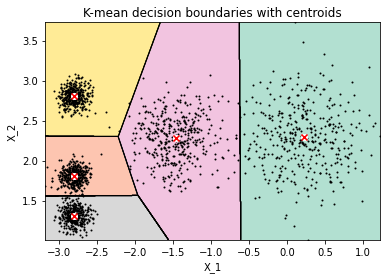

In [4]:
def plotCluster(X,y=None):
  plt.scatter(X[:,0],X[:,1],c=y, s=1)
  plt.xlabel("X_1")
  plt.ylabel("X_2")
  
def plotCentroid(center):
  plt.scatter(center[:,0], center[:,1],marker="o",color="w")
  plt.scatter(center[:,0], center[:,1],marker="x",color="r")

def plotDecisionBoundaries(model,X,title,contour = True, centroid=True):
  mins = X.min(axis=0)
  maxs = X.max(axis=0)
  xx,yy = np.meshgrid(np.linspace(mins[0],maxs[0],1000), np.linspace(mins[1],maxs[1],1000))
  ravel = np.c_[xx.ravel(),yy.ravel()]
  z = model.predict(ravel)
  z = z.reshape(xx.shape)
  if (contour):
    plt.contourf(z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Set2", alpha=0.5)
    plt.contour(z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
  plotCluster(X,"k")
  if (centroid):
    plotCentroid(model.cluster_centers_)
  plt.title(title)

plotDecisionBoundaries(kmeans_c,X,"K-mean decision boundaries with centroids")

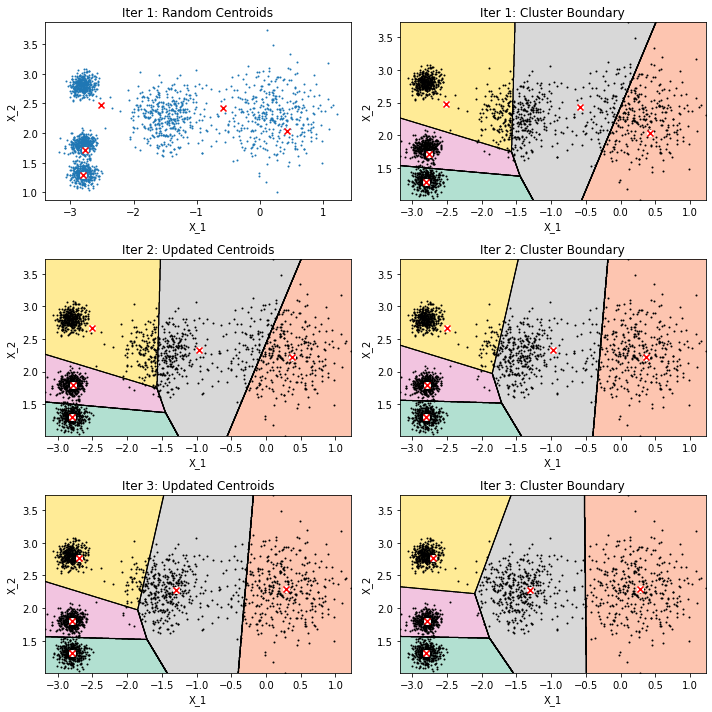

In [5]:
kmean1 = KMeans(n_clusters=5,init="random",n_init=1,max_iter=1,algorithm="full",random_state=123)
kmean2 = KMeans(n_clusters=5,init="random",n_init=1,max_iter=2,algorithm="full",random_state=123)
kmean3 = KMeans(n_clusters=5,init="random",n_init=1,max_iter=3,algorithm="full",random_state=123)

kmean1.fit(X)
kmean2.fit(X)
kmean3.fit(X)

plt.figure(figsize=(10,10))
plt.subplot(321)
plotCluster(X)
plotCentroid(kmean1.cluster_centers_)
plt.title("Iter 1: Random Centroids")

plt.subplot(322)
plotDecisionBoundaries(kmean1,X,"Iter 1: Cluster Boundary")

plt.subplot(323)
plotDecisionBoundaries(kmean1,X,"Iter 2: Updated Centroids",contour=True,centroid=False)
plotCentroid(kmean2.cluster_centers_)

plt.subplot(324)
plotDecisionBoundaries(kmean2,X,"Iter 2: Cluster Boundary",contour=True,centroid=True)

plt.subplot(325)
plotDecisionBoundaries(kmean2,X,"Iter 3: Updated Centroids",contour=True,centroid=False)
plotCentroid(kmean3.cluster_centers_)

plt.subplot(326)
plotDecisionBoundaries(kmean3,X,"Iter 3: Cluster Boundary",contour=True,centroid=True)
plt.tight_layout()

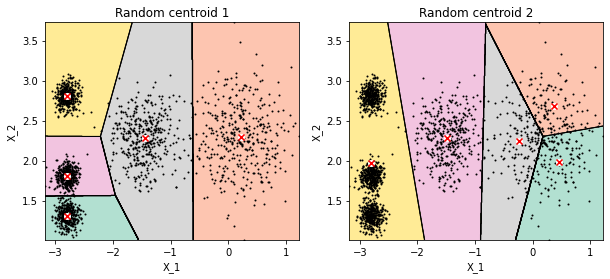

In [6]:
# Clusters with different random centroids result in different clusters
kmeans_rand1 = KMeans(n_clusters=5,init="random",n_init=1,algorithm="full",random_state=123)
kmeans_rand2 = KMeans(n_clusters=5,init="random",n_init=1,algorithm="full",random_state=456)
kmeans_rand3 = KMeans(n_clusters=5,init="random",n_init=10,algorithm="full",random_state=0)
kmeans_rand1.fit(X)
kmeans_rand2.fit(X)
kmeans_rand3.fit(X)
plt.figure(figsize=(10,4))
plt.subplot(121)
plotDecisionBoundaries(kmeans_rand1,X,"Random centroid 1",contour=True,centroid=True)
plt.subplot(122)
plotDecisionBoundaries(kmeans_rand2,X,"Random centroid 2",contour=True,centroid=True)


In [7]:
# K-means Inertia
print(kmeans_c.inertia_)
X_dist = kmeans_c.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans_c.labels_]**2)
print(kmeans_c.score(X))

print(kmeans_rand1.inertia_)
print(kmeans_rand2.inertia_)
print(kmeans_rand3.inertia_)


210.31915471169458
-210.31915471169464
210.31915471169447
607.5077136145379
210.31915471169447


In [8]:
# Manually providing the centroid init values
good_init = np.array([[-3, 0], [-3, 9], [-2, 1], [-1, 2], [0, 2]])
kmeans_manual = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans_manual.fit(X)
print(kmeans_manual.inertia_)

# using K-mean++ for init 
kmeans_Kplus = KMeans(n_clusters=5, random_state=42)
kmeans_Kplus.fit(X)
print(kmeans_Kplus.inertia_)


257.05532906139274
210.31915471169458


In [13]:
# Mini batch K means
from sklearn.cluster import MiniBatchKMeans

min_batch = MiniBatchKMeans(n_clusters=5,random_state=42)
min_batch.fit(X)
min_batch.inertia_

223.0265803013516

In [37]:
%timeit KMeans(n_clusters=5, random_state=123).fit(X)
%timeit MiniBatchKMeans(n_clusters=5, random_state=123).fit(X)

10 loops, best of 5: 60.4 ms per loop
10 loops, best of 5: 33.1 ms per loop


In [24]:
from timeit import timeit
times = np.empty((50, 2))
inertias = np.empty((50, 2))
for k in range(1, 51):
    kmeans_ = KMeans(n_clusters=k, random_state=123)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=123)
    print("\r{}/{}".format(k, 50), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

50/50

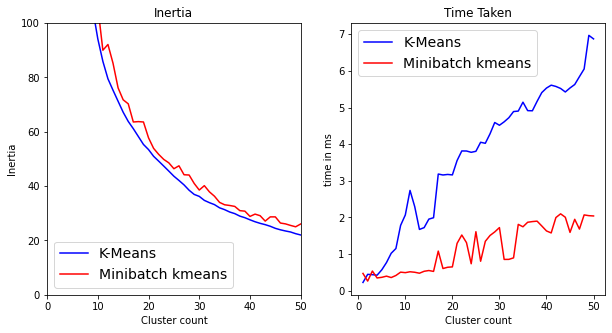

In [32]:

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(range(1,51), inertias[:,0],"b-",label="K-Means")
plt.plot(range(1,51), inertias[:,1],"r-",label="Minibatch kmeans")
plt.title("Inertia")
plt.xlabel("Cluster count")
plt.ylabel("Inertia")
plt.legend(fontsize=14)
plt.axis([0, 50, 0, 100])

plt.subplot(122)
plt.plot(range(1,51), times[:,0],"b-",label="K-Means")
plt.plot(range(1,51), times[:,1],"r-",label="Minibatch kmeans")
plt.title("Time Taken")
plt.xlabel("Cluster count")
plt.ylabel("time in ms")
plt.legend(fontsize=14)

Text(0.5, 1.0, "Selecting the number of clusters k using the 'elbow rule'")

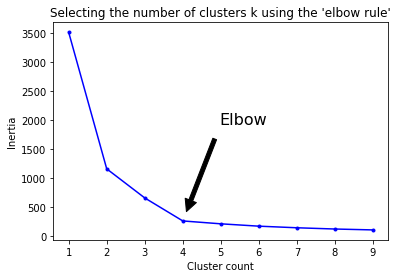

In [35]:
# Choosing the optimal clusters count
inertia_val = list()
for k in range(1, 10):
  kmeans = KMeans(n_clusters=k, random_state=123)
  kmeans.fit(X)
  inertia_val.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia_val, "b.")
plt.plot(range(1, 10), inertia_val, "b-")
plt.annotate('Elbow',
             xy=(4, inertia_val[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.xlabel("Cluster count")
plt.ylabel("Inertia")
plt.title("Selecting the number of clusters k using the 'elbow rule'")